# Felipe Cadar Chamone 2016006417

# Identidade de Euler

**Objetivos**
1. Preparo Básico para a Transformada de Fourier

**Resultado Esperado**
1. Entender a identidade de Euler

*Devido ao assunto da aula esse lab ficou mais teórico*

In [4]:
from music21 import *

import librosa
import librosa.display

import IPython.display as ipd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

plt.rcParams['axes.labelsize']  = 16
plt.rcParams['axes.titlesize']  = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 2

plt.ion()

A identidade Euler é considerada a equação matemática mais bela já feita. A mesma está representada abaixo:

$$ e^{i\pi} + 1 = 0 $$

Observe como a mesma contém:
1. A constante e, uma das constantes mais importantes da matemática. Não só isso, aqui representa exponenciação.
1. A constante pi, outra constante importante representando a geometria/trigonometria. 
1. A constante i, representando números complexos.
1. A constante 1.
1. A constante 0.
1. Uma soma
1. Uma multiplicação.
1. O resultado é zero, nada.

Em outras palavras, a identidade de Euler tem exatamente 1 operação básica de cada, sendo operadas em constantes importantes, chegando ao resultado zero (algo comum na matemática, igualar a zero). Não tem log, nem divisão, nem subtração, mas tudo isso é apenas o oposto das operações.

Sabendo da beleza da mesma, podemos derivar ela através de:

$$ e^{ix} = \cos(x) + i \sin(x) $$

Agora vamos brincar um pouco com código para visualizar a identidade de Euler.

<img src='euler.png' alt="drawing" style="width:300px;"/>

Vamos gerar uma curva de seno + cosseno no intervalo `[0, 2pi]`. Para tal, vou usar um linspace como entrada para sua função. Observe que, claramente, o eixo-x da curva cobre um comprimento de $2\pi$. Você andou essa quantidade subindo e descendo na senóide (eixo y). Na figura da direita, você andou 2pi dando uma volta no círculo.

(a escala x confunde um pouco, os plots tem o mesmo tamanho, fiz para o círculo ficar perfeito).

Como falamos em aula, um forma de pensar no caminhamento nas coordenadas polares é que cada passo de tamanha $e^{ix}$ caminha um seno e um cosseno. Porém, tal caminhamento muda de direção em cada passo!

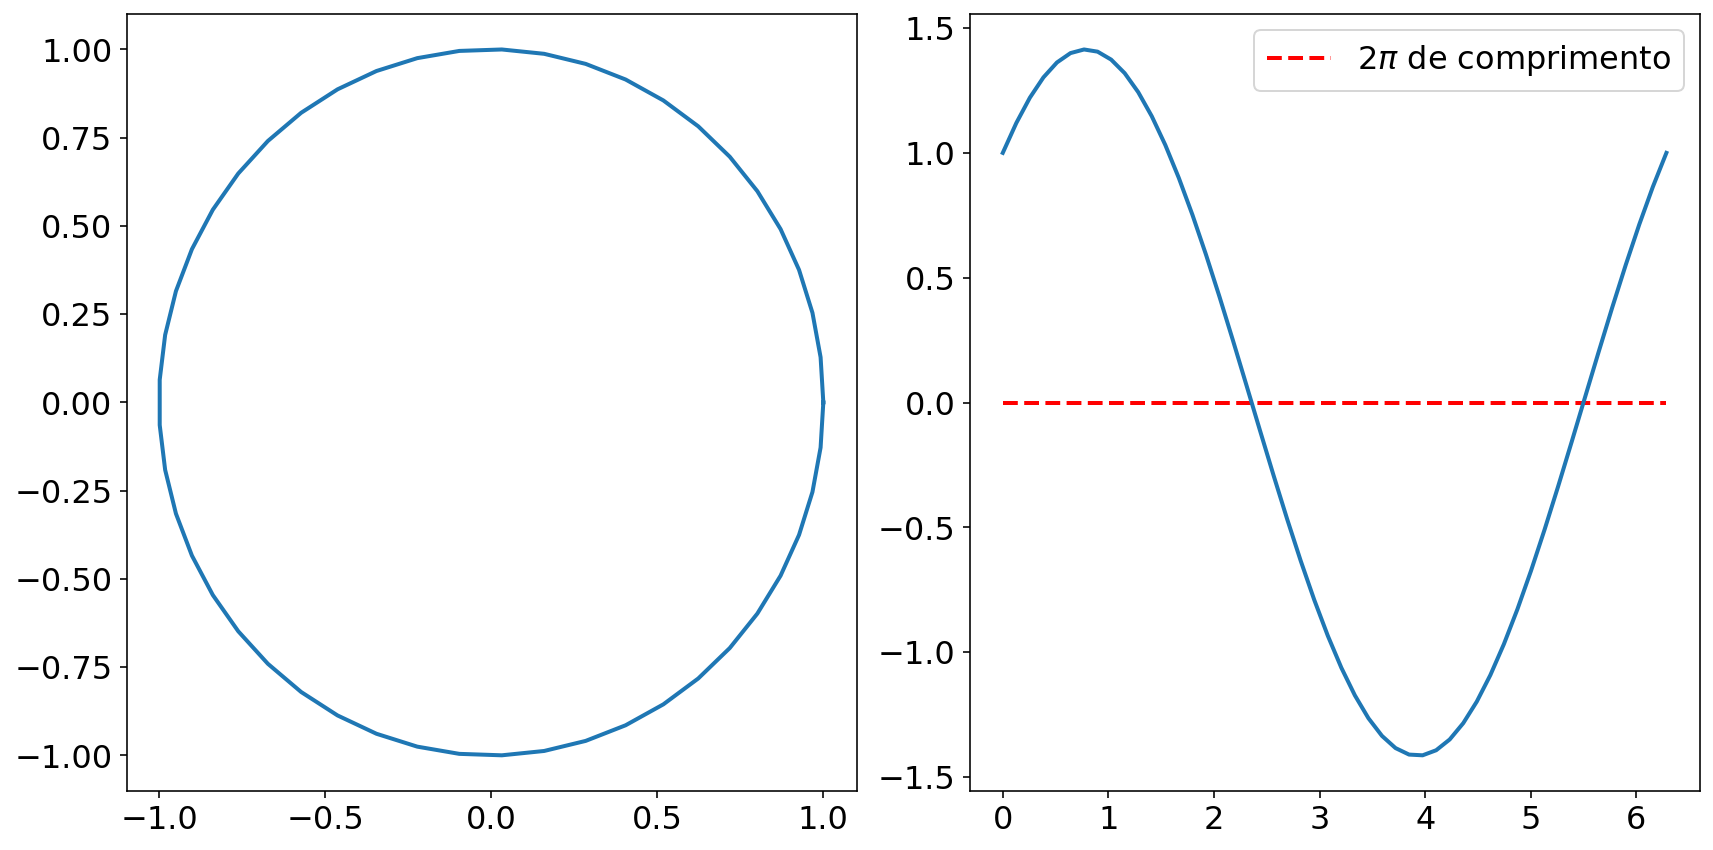

In [5]:
def sin_mais_cos(x):
    return np.sin(x) + np.cos(x)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

x = np.linspace(0, 2 * np.pi)
ax[0].plot(np.cos(x), np.sin(x))
ax[1].plot(x, sin_mais_cos(x))
ax[1].hlines(0, 0, 2 * np.pi, color='red', ls='--', lw=2, label='$2\pi$ de comprimento')
ax[1].legend()
fig.tight_layout()

Uma outra de ver isto é no código abaixo. A intensidade de cor é o valor se seno+cos. O plot mostranto tanto o caminhamento em seno quanto em coseno. Observe como a volta é representado na cor nos extremos da parte Real e Imaginária (seno e cosseno)

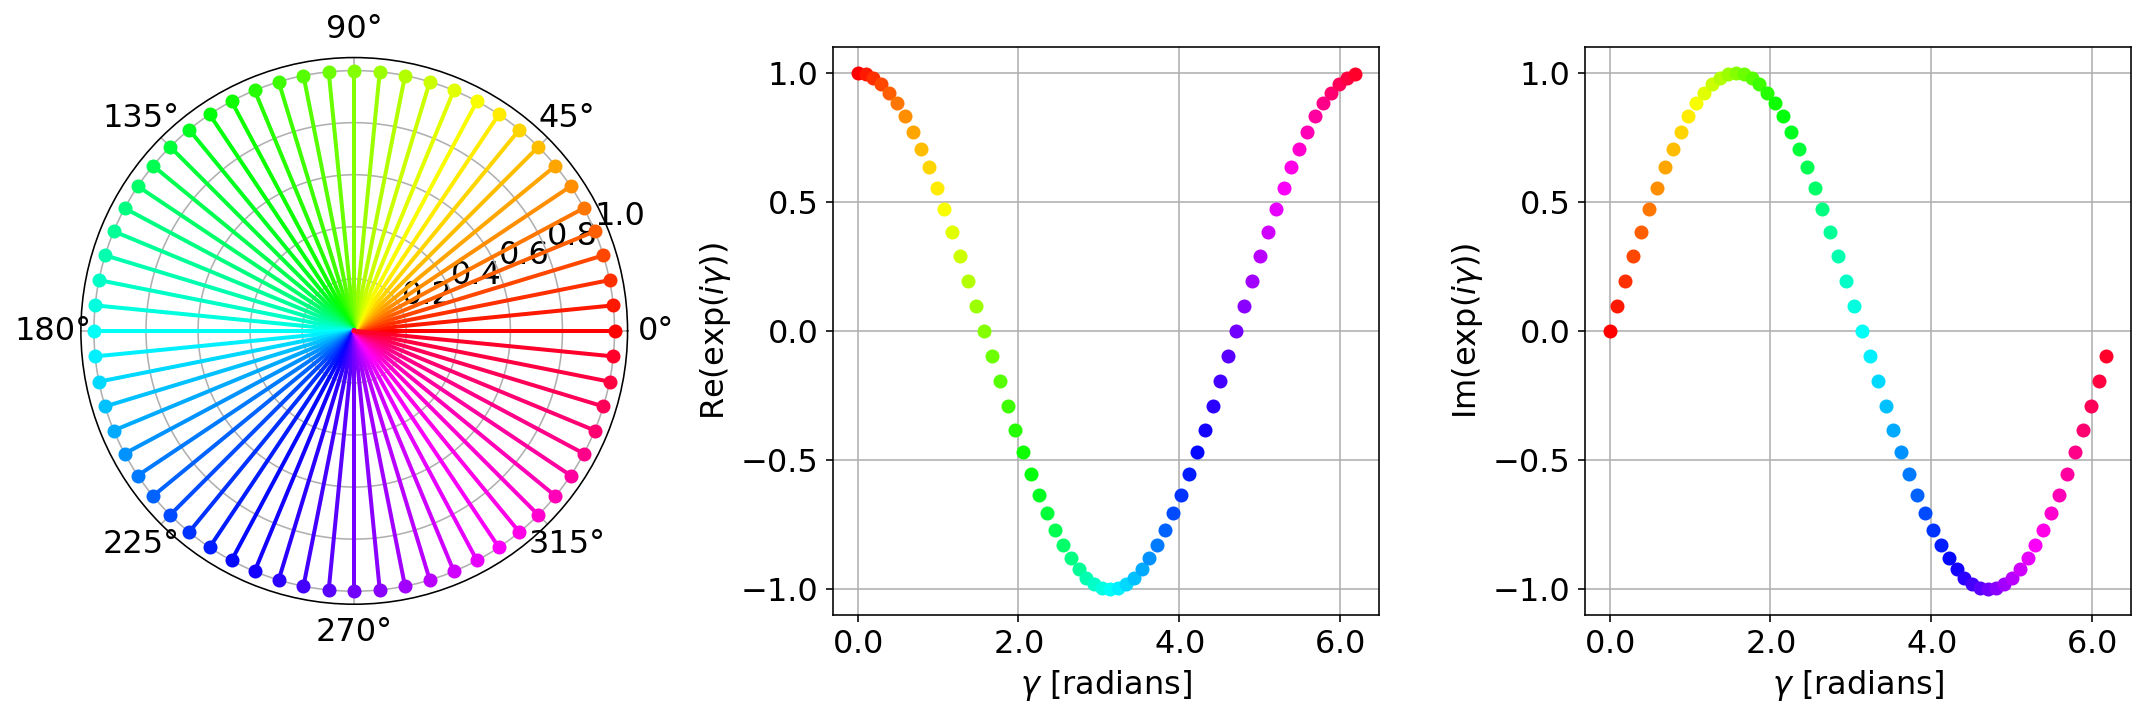

In [6]:
cmap = plt.cm.get_cmap('hsv') # hsv is nice because it is a circular color map

N = 64

fig = plt.figure(figsize=(5 * 3, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='polar')
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

for i in range(N):
    gamma = 2 * np.pi * i / N
    c = np.exp(1j * gamma)
    color = cmap(i / N)
    ax1.plot([0, np.angle(c)], [0, np.abs(c)], color=color)
    ax1.plot(np.angle(c), np.abs(c), 'o', color=color)
    ax2.plot(gamma, np.real(c), 'o', color=color)
    ax3.plot(gamma, np.imag(c), 'o', color=color)
    
ax2.grid()
ax2.set_xlabel('$\gamma$ [radians]')
ax2.set_ylabel('$\mathrm{Re}(\exp(i \gamma))$')
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%s$')) 

ax3.grid()
ax3.set_xlabel('$\gamma$ [radians]')
ax3.set_ylabel('$\mathrm{Im}(\exp(i \gamma))$')
ax3.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%s$')) 
plt.tight_layout()

## Perguntas

**Questão 1** Onde o seno e cosseno operam em radianos. É fácil plugar $\pi$ acima e chegar na identidade. O mais complicado é provar a mesma. Usando as expansões de taylor de $e$, $\sin$ e $\cos$ (vide Wikipedia), escreva a prova de $e^{ix} = \cos(x) + i \sin(x)$. Você pode usar os slides, mas formalize a prova abaixo para se convencer da mesma.

(1) $e^x = 1 + \frac{x}{1} +  \frac{x^2}{2!} ... = \sum_{n=0}^{\infty}\left ( \frac{x^n}{n!} \right )$

(2) $ x = iz $

sub (2) em (1):

(3) $e^iz = 1 + \frac{iz}{1} +  \frac{(iz)^2}{2!} ... = \sum_{n=0}^{\infty}\left ( \frac{(iz)^n}{n!} \right )$

Usando as propriedades de números complexos temos:

(4) $e^iz =( 1 - \frac{z^2}{2!} + \frac{z^4}{4!} - \frac{z^6}{6!} + \frac{z^8}{8!} - ...) +i (z - \frac{z^3}{3!} + \frac{z^5}{5!} - \frac{z^7}{7!} + ...) $

sabemos que cada um dos termos se assemelham as séries infinitas trigonométricas de cosseno e seno 

(5) $cos(z) = ( 1 - \frac{z^2}{2!} + \frac{z^4}{4!} - \frac{z^6}{6!} + ...) $

(6) $sen(z) = (z - \frac{z^3}{3!} + \frac{z^5}{5!} - \frac{z^7}{7!} + ...)$

sub (5) e (6) em (4):

(7) $e^{iz}=cos(z)+i sin(z) $ 

se fizermos z = $\pi$:

(8) $e^{i\pi} = -1 + i  0$

(9) $e^{i\pi} + 1 = 0$

**Questão 2**  Em python, `1j` quer dizer 1 imaginário `1i`. Escreva um código que aproxima a identidade de euler. 

In [23]:
print(np.e ** (1j + np.pi) + 1 ) # não entendi...

(13.50296958887651+19.472221418841603j)


In [15]:
def euler():
    np.e # use isso

**Questão 3** Crie funções que aproximam o *seno*, *cosseno* e *expoencial* via expansão de taylor.

In [41]:
# x é o valor para entrar no seno, isto é seno(x). n é a quantidade de termos na expansão.
def approx_sin(x: float, n: int):
    s = 0
    sig = 1
    for i in range(1, 2*n + 1, 2):
        print(i)
        s += sig * ((x ** i) / np.math.factorial(i))
        sig *= -1
    return s

# x é o valor para entrar no seno, isto é seno(x). n é a quantidade de termos na expansão.
def approx_cos(x: float, n: int):
    s = 0
    sig = 1
    for i in range(0, 2*n, 2):
        s += sig * ((x ** i) / np.math.factorial(i))
        sig *= -1
    return s
        

# x é o valor para entrar no seno, isto é seno(x). n é a quantidade de termos na expansão.
def approx_e(x: float, n: int):
    s = 0
    for i in range(0, n):
        s += ((x ** i) / np.math.factorial(i))
    return s

**Questão 4**  Prove as propriedades abaixo.
1. $e^{ix} = e^{i(x + 2\pi)}$
1. |𝑒^{𝑖𝑥}| = 1. Sabendo que $|c|$, onde $c = a + bi$ é $\sqrt{a + b}$.